<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Semi-confined flow
*Developed by Mark Bakker*

In [1]:
from pylab import *
%matplotlib inline

### One-dimensional, semi-confined flow

In semi-confined aquifers, the top of the aquifer is formed by a leaky layer consisting of low-permeable material such as peat or clay (see figure below). The water table above or in this leaky layer is fixed. 

<img src="semi1.png" width="300">

**Figure.** A semi-confined aquifer covered by a leaky layer and a fixed water level $h^*$

Semi-confined aquifers occur, for example, below lakes or rives that have a leaky layer at their bottom, or below polders where the water table is fixed with ditches and drains. The specific dicharge $q_z$ through the leaky layer is considered to be vertical and 
may be computed with Darcy's law as

$$
q_z = -k_v \frac{h^*-h}{H_v}
$$

where $h$ is the head in the aquifer, $h^*$ is the fixed head above the leaky layer, $k_v$ is the vertical hydraulic conductivity of the leaky layer, and $H_v$ is the thickness of the leaky layer. The specific discharge through the leaky layer is commonly written in the form 

$$
q_z = \frac{h-h^*}{c}
$$

where $c=H_v/k_v$ [T] is the resistance to vertical flow of the leaky layer. As shown before, one-dimensional flow in an aquifer with constant transmissivity $kH$ is governed by the differential equation 

$$
\frac{\text{d}^2h}{\text{d}x^2} = -\frac{N}{kH}
$$

where $N$ is the areal recharge, defined positive for water entering the aquifer. For semi-confined aquifers, the area recharge $N$ is equal to the opposite of the vertical discharge through the leaky layer $N=-q_z$, so that the differential equation becomes

$$
\frac{\text{d}^2h}{\text{d}x^2} = \frac{h-h^*}{ckH}
$$

For the case that $h^*$ is a constant, this equation can be rewritten as

$$
\frac{\text{d}^2(h-h^*)}{\text{d}x^2} = \frac{h-h^*}{\lambda^2}
$$

where 

$$
\lambda=\sqrt{kHc}
$$

is referred to as the leakage factor and is a characteristic length of the system, as will be explained later. The differential equation above is a second order, linear, homogeneous, ordinary differential equation known as the modified Helmholtz equation. The general solution is

$$
h-h^* = A\text{e}^{-x/\lambda} + B\text{e}^{x/\lambda}
$$

where $A$ and $B$ are constants to be determined from boundary conditions. 

### Semi-confined flow bounded by a canal
Consider one-dimensional flow in a semi-infinite, semi-confined aquifer bounded on the left with a fully penetrating canal with water level $h_0$, as shown in the figure below. 

<img src="semi2.png" width="300">

**Figure.** Semi-confined flow in a semi-infinite aquifer bounded by a canal on the left

The governing differential equation is the modified Helmholtz equation, as derived above. The boundary conditions are

$$
\begin{split}
x&=0 \qquad h=h_0 \\
x&\to\infty \qquad h=h^*
\end{split}
$$

Application of the second boundary condition gives $B=0$, after which application of the first boundary condition gives $A=h_0-h^*$, so that the equation for $h$ becomes

$$
h = (h_0-h^*)\text{e}^{-x/\lambda} + h^*
$$

and the discharge vector in the aquifer is

$$
Q_x = -kH\frac{\text{d}h}{\text{d}x}=\frac{kH(h_0-h^*)}{\lambda}\text{e}^{-x/\lambda}
$$

Water flows from the canal into the semi-confined aquifer and then through the leaky layer into the overlying polder (provided that the head in the canal is larger than the head in the polder). The total discharge per meter length of the canal is called $Q_0$ and is obtained by evaluating $Q_x$ at $x=0$, which gives $Q_0=kH(h_0-h^*)/\lambda$.
Evaluation of the solution shows that the discharge at $x=\lambda$ has reduced the discharge in the aquifer to $\text{e}^{-1}Q_0=0.37Q_0$ at $x=\lambda$, and to only $0.05Q_0$ at $x=3\lambda$. Hence, 95\% of the water that flows from the canal into the aquifer has discharged into the polder within a distance of $3\lambda$ from the canal. Similarly, the difference between the head in the aquifer and the head in the polder reduces from $h_0-h^*$ at the canal ($x=0$) to only $0.05(h_0-h^*)$ at $x=3\lambda$. Roughly speaking, three times the leakage factor (the characteristic length) away from the canal, the head in the aquifer is approximately equal to the head $h^*$ above the semi-confined aquifer. The solution is plotted in the example below.

the leakage factor is: 100.0 m


(0, 500)

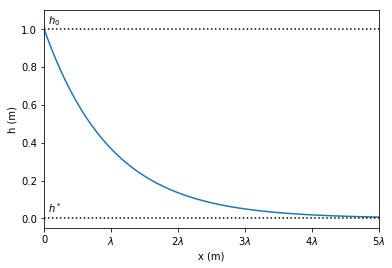

In [2]:
hstar = 0
h0 = 1
k = 10
H = 10
c = 100
lab = sqrt(k * H *c)
print('the leakage factor is:', lab, 'm')
x = np.linspace(0, 5 * lab, 100)
h = (h0 - hstar) * exp(-x / lab) + hstar
plot(x, h)
xlabel('x (m)')
ylabel('h (m)')
axhline(1, linestyle=':', color='k')
axhline(0, linestyle=':', color='k')
text(5, 0.03, '$h^*$')
text(5, 1.03, '$h_0$')
xticks(arange(0, 501, 100), ['0', '$\lambda$', '$2\lambda$', '$3\lambda$', '$4\lambda$', '$5\lambda$']);
ylim(-0.05, 1.1)
xlim(0, 500)

### Semi-confined flow between two polders
Consider one-dimensional flow between two polders, as shown in the figure below. The semi-confined aquifer exends to infinity on both sides. The head in the polder on the left is $h_1^*$ while the head in the polder on the right is $h_2^*$. The aquifer parameters are the same everywhere. 

<img src="semi3.png" width="300">
**Figure.** Flow between two polders with different water levels


The governing differenial equations are

$$\begin{split}
\frac{\text{d}^2(h-h_1^*)}{\text{d}x^2} &= \frac{h-h_1^*}{\lambda^2} \qquad x\le 0 \\
\frac{\text{d}^2(h-h_2^*)}{\text{d}x^2} &= \frac{h-h_2^*}{\lambda^2} \qquad x\ge 0 
\end{split}$$

so that there are different solutions for the left and right sides.

$$\begin{split}
h=h_1^* +  A_1\text{e}^{-x/\lambda} + B_1\text{e}^{x/\lambda}  \qquad x\le 0 \\
h=h_2^* + A_2\text{e}^{-x/\lambda} + B_2\text{e}^{x/\lambda}  \qquad x\ge 0 \\
\end{split}$$

The boundary conditions are that the head approaches $h_1^*$ far to the left, the head approaches $h_2^*$ far to the right, and the head and flow are continuous at $x=0$

$$\begin{split}
&x\to-\infty \qquad h=h_1^* \\
&x\to+\infty \qquad h=h_2^* \\
&h(x=0^-)=h(x=0^+) \\
&Q_x(x=0^-)=Q_x(x=0^+) 
\end{split}$$

where $0^-$ and $0^+$ stand for just to the left and just to the right of zero. Application of the first two boundary conditions gives $A_1=0$ and $B_2=0$, after which application of the two continuity conditions gives the following two equations 

$$\begin{split}
h_1^*+B_1 &= h_2^* + A_2 \\
-kH\frac{B_1}{\lambda} &= kH\frac{A_2}{\lambda}
\end{split}$$

Solving for the two remaining unknowns $A_2$ and $B_1$ gives

$$
B_1 = -\frac{h_1^*-h_2^*}{2} \qquad A_2 = \frac{h_1^*-h_2^*}{2} 
$$

and hence

$$\begin{split}
h&=h_1^*  -\frac{h_1^*-h_2^*}{2} \text{e}^{x/\lambda}  \qquad x\le 0 \\
h&=h_2^* + \frac{h_1^*-h_2^*}{2} \text{e}^{-x/\lambda} \qquad x\ge 0 \\
\end{split}$$

Note that the head in the aquifer at $x=0$ is $(h_1^*+h_2^*)/2$ as is to be expected from symmetry for this case where the aquifer properties are the same on the left and right sides. The total flow $Q_0$ from the polder on the left to the polder on the right is obtained by evaluating the discharge vector at $x=0$, which gives $Q_0=kH(h_1^*-h_2^*)/(2\lambda)$ (this is the discharge for a slice of 1 m normal to the plane of flow). The solution is plotted in the example below.

the leakage factor is: 100.0 m


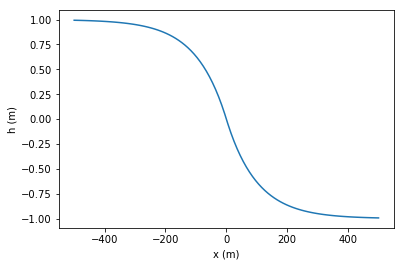

In [3]:
h1star = 1
h2star = -1
k = 10
H = 10
c = 100
lab = sqrt(k * H *c)
print('the leakage factor is:', lab, 'm')
x = np.linspace(-5 * lab, 5 * lab, 100)
h = zeros_like(x)
h[x < 0] = h1star - (h1star - h2star) / 2 * exp(x[x < 0] / lab)
h[x >= 0] = h2star + (h1star - h2star) / 2 * exp(-x[x >= 0] / lab)
plot(x, h)
xlabel('x (m)')
ylabel('h (m)');

### Exercises
#### Exercise 1
A semi-confined aquifer is bounded by two infinite rivers that are a distance $L$ apart. The origin of the $x$-axis is at the left river, and the heads along the river banks are $h_1$ on the left $(x=0)$ and $h_2$ on the right $(x=L)$. The head above the leaky layer is $h^*$. The transmissivity of the aquifer is $kH$ and the resistance of the semi-confining layer is $c$.

Questions:

a) Determine the head as a function of position

It is given that: $kH=100$ m$^2$/d, $c=2000$ d, $L=2000$ m, $h_1=20$ m, $h_2=20$ m, $h^*=18$ m. 

b) Plot the head as a function of $x$.

c) Determine the total leakage into the aquifer.

#### Answer 1
a) 

$$
h = A\text{e}^{-x/\lambda} + B\text{e}^{x/\lambda} + h^*
$$

with

$$
A = \frac{h_1\text{e}^{L/\lambda} - h_2 + (1-\text{e}^{L/\lambda})h^*} {\text{e}^{L/\lambda}-\text{e}^{-L/\lambda}}
\qquad
B = \frac{h_1\text{e}^{-L/\lambda} - h_2 + (1-\text{e}^{-L/\lambda})h^*} {\text{e}^{-L/\lambda}-\text{e}^{L/\lambda}}
$$

c) Discharge vector

$$
Q_x = -kH\left(-\frac{A}{\lambda}\text{e}^{-x/\lambda} + \frac{B}{\lambda}\text{e}^{x/\lambda}\right)
$$

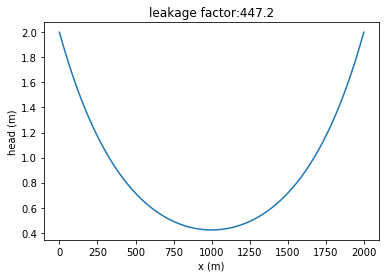

In [4]:
kH = 100
c = 2000
L = 2000
h1 = 20
h2 = 20
hstar = 18
lab = sqrt(kH * c)
A = (h1 * exp(L / lab) - h2 + (1 - exp(L / lab)) * hstar) / (
     exp(L / lab) - exp(-L / lab))
B = (h1 * exp(-L / lab) - h2 + (1 - exp(-L / lab)) * hstar) / (
     exp(-L / lab) - exp(L / lab))
x = np.linspace(0, L, 100)
h = A * exp(-x / lab) + B * exp(x / lab)
plot(x, h)
xlabel('x (m)')
ylabel('head (m)')
title('leakage factor:' + str(round(lab, 1)));

In [5]:
Qx1 = kH * (A - B) / lab
print('total leakage into the aquifer:', 2 * Qx1)

total leakage into the aquifer: 0.874224080322


Qx at x=0: 0.437112040161
Qx at x=L: -0.437112040161


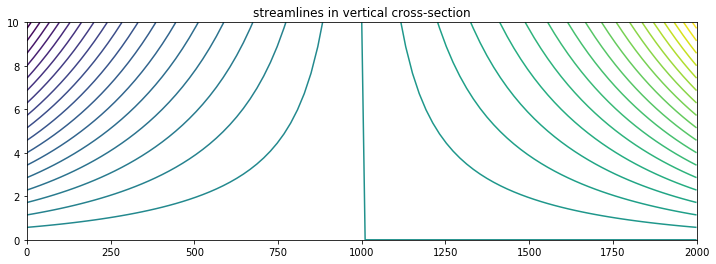

In [6]:
def Qx(x):
    rv = -kH * (-A / lab * exp(-x / lab) + B / lab * exp(x / lab))
    return rv
print('Qx at x=0:', Qx(0))
print('Qx at x=L:', Qx(L))
x = linspace(0, L, 100)
y = array([0, 10])
psi = np.zeros((2, 100))
psi[1] = -Qx(x)
figure(figsize=(12, 4))
contour(x, y, psi, 40)
title('streamlines in vertical cross-section');

#### Exercise 2
Consider one-dimensional steady flow into a long and wide lake with a leaky bottom. A coordinate system is chosen such that $x=0$ at the shore of the lake. For $x\le 0$ flow is confined and the transmissivity of the aquifer is $kH$.  For $x\ge 0$ flow is semi-confined. The transmissivity of the aquifer is $kH$, the resistance of the leaky semi-confining layer is $c$, and the water level in the lake is $h_L$. The discharge vector in the confined part of the aquifer is constant and is known from a water balance as $Q_x=Q_0$. 

Questions:

a) Determine an expression for the head as a function of $x$ in the aquifer below the lake. Hint: Use that $Q_x(x=0)=Q_0$. 

b) Give an expression for the head $h_0$ in the aquifer at the lake shore $(x=0)$. 

c) Determine an expression for the head as a function of $x$ in the confined part of the aquifer.

In order to measure the resistance of the lake bottom, an observation well is drilled at $x=-L$. The head in the observation well is $h_1$. Given: $kH=20$ m$^2$/d, $h_L=0$, $h_1=0.4$ m, $L=200$ m, $Q_0=0.02$ m$^2$/d.

d) Compute the resistance of the lake bottom.

e) Plot the head as a function of $x$.

<img src="hw3_q1_fig.png" width="450">

#### Answer 2

a) $h = h_L + A\text{e}^{-x/\lambda}$. $Q_x=\frac{k}{\lambda}A\text{e}^{-x/\lambda}$.
$Q_x(x=0)=Q_0$ $\to$ $A=Q_0\lambda/(kH)$ $\to$ $h = h_L + \frac{Q_0\lambda}{kH}\text{e}^{-x/\lambda}$

b) $h_0=h_L + \frac{Q_0\lambda}{kH}$

c) $h=-Q_0x/(kD)+h_0=-Q_0(x-\lambda)/(kH)+h_L$

d) $h(x=-L)= Q_0(L+\lambda)/(kH)=h_1$ $\to$ $\lambda = kH(h_1-h_L)/Q_0-L$ $\to$ $c=\left(\frac{kH(h_1-h_L)}{Q_0}-L\right)^2/(kH)=2000$ d.

c value: 2000.0


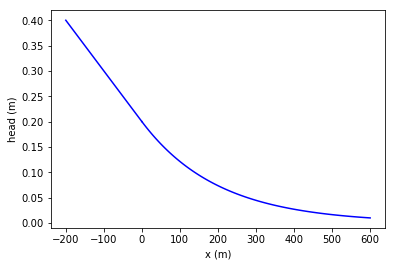

In [7]:
hL = 0
h1 = 0.4
L = 200
Q0 = 0.02
kH = 20
c = (kH * h1 / Q0 - L) ** 2 / kH
print('c value:', c)
lab = sqrt(kH * c)

def headleft(x):
    return -Q0 * (x - lab) / kH + hL

def headright(x):
    return hL + Q0 * lab / kH * exp(-x / lab)
    
xleft = linspace(-L, 0, 100)
xright = linspace(0, 3 * lab, 100)
hl = headleft(xleft)
hr = headright(xright)
plot(xleft, hl, 'b')
plot(xright, hr, 'b')
xlabel('x (m)')
ylabel('head (m)');

#### Exercise 3
Consider one-dimensional flow between two lakes, as shown below. The semi-confined aquifer exends to infinity on both sides. The head in the polder on the left is $h_1^*$ while the head in the polder on the right is $h_2^*$. The aquifer parameters are $kH$ and $c$ and are the same everywhere. An impervious sheet is placed at the bottom of the lake over the interval $0\le x\le L$. 

Question:

Determine the flow underneath the dam and compare your answer to the answer for the case without the impervious sheet (which was solved above).

<img src="hw3_semi3.png" width="450">

#### Answer 3
Let's call the flow underneath the dam $Q_0$, so that $Q_x=-Q_0$ under the impervious sheet, then

$$
Q_x = -Q_0\text{e}^{x/\lambda} \qquad h = \frac{Q_0\lambda}{T}\text{e}^{x/\lambda} + h_1^* \qquad
x \le 0
$$

$$
Q_x = -Q_0 \qquad h=\frac{Q_0}{T}x + C \qquad 0\le x\le L
$$

$$
Q_x = -Q_0\text{e}^{-(x-L)/\lambda} \qquad h = \frac{-Q_0\lambda}{T}\text{e}^{-(x-L)/\lambda} + h_2^* \qquad
x \ge 0
$$

Setting the heads of the different solutions equal at $x=0$ and $x=L$ gives

$$
h(x=0) = \frac{Q_0\lambda}{T}+h_1^* = C
$$

$$
h(x=L) = \frac{Q_0}{T}L + C = \frac{-Q_0\lambda}{T}+h_2^*
$$

so that

$$
Q_0=T\frac{(h_2^*-h_1^*)}{2\lambda+L}
$$

which reduces to the equation for the case without the impermeable sheet when $L=0$.

### Flow in a two-aquifer system
Consider flow in a two-aquifer system as shown in the figure below.  Aquifers 1 and 2 have transmissivities $T_1=k_1H_1$ and $T_2=k_2H_2$, respectively, and are separated by a leaky layer with resistance to vertical flow $c$. The leakage between aquifer 2 (the bottom one) and aquifer 1 (the top one) is computed as

$$
q_z = \frac{h_2-h_1}{c}
$$

where $h_1$ and $h_2$ are the heads in layers 1 and 2, respectively. Flow is steady and one-dimensional. Separate differential equations may be written down for the head in layer 1 and the head in layer 2 by substituting either $+q_z$ or $-q_z$ for $N$ in the differential equation,  which gives

$$\begin{split}
\frac{\text{d}^2h_1}{\text{d}x^2} &= \frac{-q_z}{T_1} \\
\frac{\text{d}^2h_2}{\text{d}x^2}& = \frac{q_z}{T_2}
\end{split}$$

so that, with $q_z=(h_2-h_1)/c$,

$$\begin{split}
\frac{\text{d}^2h_1}{\text{d}x^2} &= \frac{h_1-h_2}{cT_1} \\
\frac{\text{d}^2h_2}{\text{d}x^2}& = \frac{h_2-h_1}{cT_2}
\end{split}$$
This is a linked system of two ordinary differential equations.

<img src="twoaq1.png" width="300">
**Figure.** Flow in a two-aquifer system.


Solution of the system of two coupled differential equations is complicated by the fact that both differential equations depend on both $h_1$ and $h_2$. A solution may be obtained when it is possible to split the system in two seperate differential equations for specific combinations of $h_1$ and $h_2$ as follows. The first equation is multiplied with $T_1$, the second equation is multiplied with $T_2$, and the two resulting equations are added, which gives

$$
\frac{\text{d}^2(T_1h_1+T_2h_2)}{\text{d}x^2} = 0
$$

This equation shows that $(T_1h_1+T_2h_2)$ is governed by Laplace's differential equation, just like regular confined flow. 

Going back to the system of two differential equations and subtracting the second equation from the first equation   gives

$$
\frac{\text{d}^2(h_1-h_2)}{\text{d}x^2}  = \frac{h_1-h_2}{cT_1} - \frac{h_2-h_1}{cT_2} = \frac{T_1+T_2}{cT_1T_2}(h_1-h_2)
$$

or 

$$
\frac{\text{d}^2(h_1-h_2)}{\text{d}x^2}  =\frac{h_1-h_2}{\lambda^2}
$$

where

$$
\lambda = \sqrt{ \frac{cT_1T_2}{T_1+T_2} }
$$

This shows that $(h_1-h_2)$ is governed by the modified Helmholtz equation, just like regular semi-confined flow, but the leakage factor $\lambda$ is now defined as shown above.

The solution for one-dimensional flow that fulfills Laplace's equation is

$$
T_1h_1+T_2h_2 = A^*x + B^* 
$$

where $A^*$ and $B^*$ are coefficients to be chosen to meet boundary conditions. The solution for one-dimensional flow that fulfills the modified Helmholtz equation is given by

$$
h_1-h_2 = C^*\text{e}^{-x/\lambda} + D^*\text{e}^{x/\lambda}
$$

where $C^*$ an $D^*$ are coefficients to be chosen to meet boundary conditions. 
Multiplication of the second equation by $T_2$ and addition of the two equations gives

$$
(T_1+T_2)h_1 = A^*x + B^* + C^*T_2\text{e}^{-x/\lambda}+ D^*T_2\text{e}^{x/\lambda}
$$

while multiplication of the second equation by $T_1$ and subtration of the two equations gives

$$
(T_1+T_2)h_2 = A^*x + B^* - C^*T_1\text{e}^{-x/\lambda}- D^*T_1\text{e}^{x/\lambda}
$$

Introducing new coefficients $A$, $B$, $C$, and $D$ through division of the original coefficients with a star by $(T_1+T_2)$ gives

$$
h_1 = Ax + B + CT_2\text{e}^{-x/\lambda}+ DT_2\text{e}^{x/\lambda}
$$

$$
h_2 = Ax + B - CT_1\text{e}^{-x/\lambda}- DT_1\text{e}^{x/\lambda}
$$

This solution for the discharge vectors in each layer, $Q_{x1}$ and $Q_{x2}$, are obtained by differentiation

$$
Q_{x1} = -AT_1 + C\frac{T_1T_2}{\lambda}\text{e}^{-x/\lambda} - D\frac{T_1T_2}{\lambda}\text{e}^{x/\lambda}
$$

$$
Q_{x2} = -AT_2 - C\frac{T_1T_2}{\lambda}\text{e}^{-x/\lambda} + D\frac{T_1T_2}{\lambda}\text{e}^{x/\lambda}
$$

The total discharge in the aquifer $Q_x$ is the sum of the discharges in layers 1 and 2 and simplifies to

$$
Q_x = -A(T_1+T_2)
$$

Note that the vertical flow between layer 2 and layer 1 may be obtained directly from the definition of $q_z$ and the equations for $h_1$ and $h_2$

$$
q_z = -\frac{(T_1+T_2)(C\text{e}^{-x/\lambda} + D\text{e}^{x/\lambda})}{c}
$$

### Flow to a canal screened in layer 1
Consider two-aquifer flow in an infinite aquifer with a canal in the top layer (see the figure belo). 


<img src="twoaq2.png" width="300">
**Figure.** Flow in a semi-infinite two-aquifer system with a canal in the top layer

The head is governed by the system of differential equations presented in the previous section. The boundary conditions are that to the far left the gradient of the head is specified as $G$ in both aquifers, the head in the canal is equal to $h_0$ and the flow system is symmetric (i.e., the inflow into the canal is equal on both sides), so that the flow is zero in layer 2 below the canal. In mathematical terms

$$\begin{split}
&x\to-\infty \qquad Q_{x1}=-T_1 G \\
&x\to-\infty \qquad Q_{x2}=-T_2 G \\
&h_1(x=0)=h_0 \\
&Q_{x2}(x=0)=0 
\end{split}$$

Application of the first boundary conditions gives $C=0$ and

$$
Q_{x1} = -AT_1 = -T_1G \qquad \to \qquad A=G
$$

Application of the last boundary condition gives

$$
Q_{x2}(x=0) = -GT_2 + D\frac{T_1T_2}{\lambda} = 0 \qquad \to \qquad  D=G\lambda/T_1 
$$

Finally, application of the boundary condition in layer 1 at $x=0$ gives

$$
h_1(x=0) = B + G\lambda T_2/T_1 = h_0 \qquad \to \qquad  B=h_0-G\lambda T_2/T_1
$$

The solution for the head now becomes

$$\begin{split}
h_1 &= Gx + \frac{G\lambda T_2}{T_1}\text{e}^{x/\lambda} -\frac{G\lambda T_2}{T_1} + h_0 \\
h_2 &= Gx - G\lambda\text{e}^{x/\lambda} - \frac{G\lambda T_2}{T_1} + h_0
\end{split}$$

Note that the total discharge $Q_0$ towards the canal from the left side is the sum of the discharges in the two layers, which is, from continuity, $Q_0=-(T_1+T_2)G$. 
An expression for the discharge in both aquifers is obtained through differentiation

$$\begin{split}
Q_{x1} &= -T_1\frac{\text{d}h_1}{\text{d} x} = -T_1G - G T_2\text{e}^{x/\lambda} \\
Q_{x2} &= -T_2\frac{\text{d}h_1}{\text{d} x} =-T_2G +  GT_2\text{e}^{x/\lambda}
\end{split}$$

so that indeed everywhere $Q_{x_1}+Q_{x2}=Q_0$ and at the canal $Q_{x1}(x=0)=Q_0$ and $Q_{x2}(x=0)=0$.


---
*Note: Questions 1 and 3 were modified from Strack, 1989, Groundwater Mechanics*